<a href="https://colab.research.google.com/github/Lucy-Moctezuma/SFSU-CodeLab-Work-/blob/main/MARC%20Machine%20Learning%20Project/2_Workshop/Support%20files%20(unused)%20/Bridge_filter_and_maxPooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

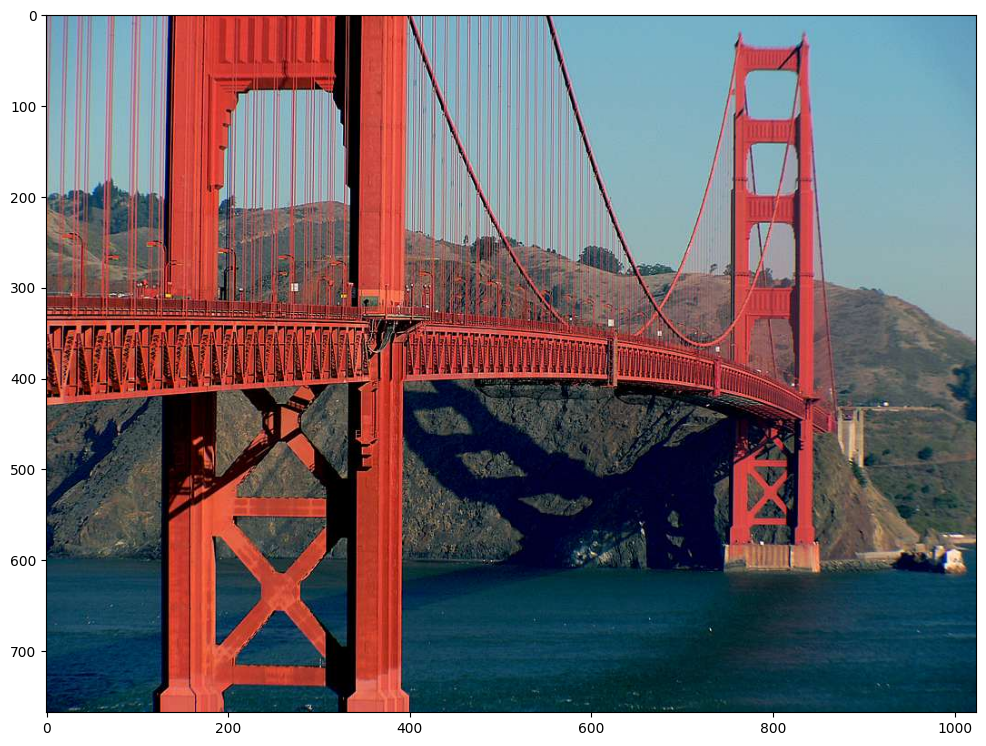

In [2]:
image = cv2.imread('/content/drive/MyDrive/SFSU (Dr. Pleuni)/NEURAL NETWORKS images/the-golden-gate-bridge-650ae8-1024.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, figsize=(12,12))
plt.imshow(image)

In [3]:
def asStride(arr, sub_shape, stride):
    '''Get a strided sub-matrices view of an ndarray.
    Args:
        arr (ndarray): input array of rank 2 or 3, with shape (m1, n1) or (m1, n1, c).
        sub_shape (tuple): window size: (m2, n2).
        stride (int): stride of windows in both y- and x- dimensions.
    Returns:
        subs (view): strided window view.
    See also skimage.util.shape.view_as_windows()
    '''
    s0, s1 = arr.strides[:2]
    m1, n1 = arr.shape[:2]
    m2, n2 = sub_shape[:2]
    view_shape = (1+(m1-m2)//stride, 1+(n1-n2)//stride, m2, n2)+arr.shape[2:]
    strides = (stride*s0, stride*s1, s0, s1)+arr.strides[2:]
    subs = np.lib.stride_tricks.as_strided(
        arr, view_shape, strides=strides, writeable=False)
    return subs

    
def poolingOverlap(mat, f, stride=None, method='max', pad=False,
                   return_max_pos=False):
    '''Overlapping pooling on 2D or 3D data.
    Args:
        mat (ndarray): input array to do pooling on the first 2 dimensions.
        f (int): pooling kernel size.
    Keyword Args:
        stride (int or None): stride in row/column. If None, same as <f>,
            i.e. non-overlapping pooling.
        method (str): 'max for max-pooling,
                      'mean' for average-pooling.
        pad (bool): pad <mat> or not. If true, pad <mat> at the end in
               y-axis with (f-n%f) number of nans, if not evenly divisible,
               similar for the x-axis.
        return_max_pos (bool): whether to return an array recording the locations
            of the maxima if <method>=='max'. This could be used to back-propagate
            the errors in a network.
    Returns:
        result (ndarray): pooled array.
    See also unpooling().
    '''
    m, n = mat.shape[:2]
    if stride is None:
        stride = f
    _ceil = lambda x, y: x//y + 1
    if pad:
        ny = _ceil(m, stride)
        nx = _ceil(n, stride)
        size = ((ny-1)*stride+f, (nx-1)*stride+f) + mat.shape[2:]
        mat_pad = np.full(size, 0)
        mat_pad[:m, :n, ...] = mat
    else:
        mat_pad = mat[:(m-f)//stride*stride+f, :(n-f)//stride*stride+f, ...]
    view = asStride(mat_pad, (f, f), stride)
    if method == 'max':
        result = np.nanmax(view, axis=(2, 3), keepdims=return_max_pos)
    else:
        result = np.nanmean(view, axis=(2, 3), keepdims=return_max_pos)
    if return_max_pos:
        pos = np.where(result == view, 1, 0)
        result = np.squeeze(result)
        return result, pos
    else:
        return result

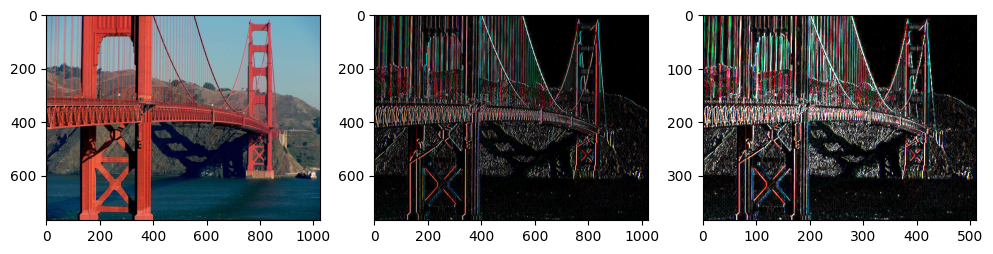

In [4]:
kernelv = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

kernelh= np.array([[-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]])

img = cv2.filter2D(image, -1, kernelv)
imgMax = poolingOverlap(img,2,stride=2,method="max",pad=False)
fig, ax = plt.subplots(1,3,figsize=(12,12))
ax[0].imshow(image)
ax[1].imshow(img)
ax[2].imshow(imgMax)